# Deep Learning Tutorial.
## Binary Classification model with Keras Deep Learning
### 1. Construct a multi-layer neural network model.
### 2. Tune the hyper-parameters for training a model.
### 3. Evaluate a model.


# Dataset:
## Pima Indians Diabetes
# Fields description follow:
## preg = Number of times pregnant
## plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
## pres = Diastolic blood pressure (mm Hg)
## skin = Triceps skin fold thickness (mm)
## test = 2-Hour serum insulin (mu U/ml)
## mass = Body mass index (weight in kg/(height in m)^2)
## pedi = Diabetes pedigree function
## age = Age (years)
## class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)





# Install the following:
## pip install tensorflow==2.0.0




# Download the data and then convert it to pandas dataframe to analyze it.

In [1]:
# for the operating system operations e.g., creating a folder.
import os

# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Print tensorfow (TF) version. Make sure you have at least tensorflow 2.1.0
print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.7.0


In [2]:
# import the dataset.
# from tensorflow.keras.datasets import boston_housing

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [3]:
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [4]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)


# uncomment the following line to use a GPU (Graphical Processing Unit) 
#if you have it available at your machine. This unit will make your code run faster.
# tf.config.experimental.list_physical_devices('GPU')  

In [5]:
all_ds = pd.read_csv('data_binary.csv')
all_ds

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (768, 9)


In [7]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Cleaning the data.

In [8]:
print("Display NA values in each columns: ")
all_ds.isna().sum(axis=0)

Display NA values in each columns: 


preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
print("Display NA values in each row: ")
all_ds.isna().sum(axis=1)

Display NA values in each row: 


0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64

In [10]:
print("Display NULL values in each columns: ")
all_ds.isnull().sum()

Display NULL values in each columns: 


preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [11]:
print("Display NULL values in each row: ")
all_ds.isnull().sum(1)

Display NULL values in each row: 


0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64

In [12]:
# Remove the rows with NA values.
all_ds = all_ds.dropna()

# You can also use the following line to fill the NA with Zeros.
# all_ds = all_ds.fillna(0)
# all_ds = all_ds.fillna(mean_of_column)



In [13]:
# slice the data set and keep last n rows of the dataset.  E.g., you want to save the last 20 rows from the dataset into a new dataset.
n = 20
temp_ds = all_ds[:n]
temp_ds.shape

(20, 9)

# Sample the dataset randomly and return fraction (e.g., frac=50% will return 50% of the data) from the dataset.

In [14]:
# all_ds[10:]
# all_ds.sample(frac=1) # this will shuffle all of the dataset and randomly re-organize the rows.

all_ds = all_ds.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)
# all_ds_90pct = all_ds.sample(frac=0.9) # randomly sample the dataset and keep 90% of the rows.
# all_ds_90pct.shape

# Split the data into train/test splits.

In [15]:
# THis is an alternative method to split the data and replace train_test_split.
# train_dataset = all_ds_90pct.sample(frac=0.6) # This will select 80
# test_dataset = all_ds_90pct.drop(train_dataset.index)

In [16]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(460, 9)
(308, 9)


In [17]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(154, 9)
(154, 9)


In [18]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (460, 9)
 Test dataset       : (154, 9)
 Validation dataset : (154, 9)


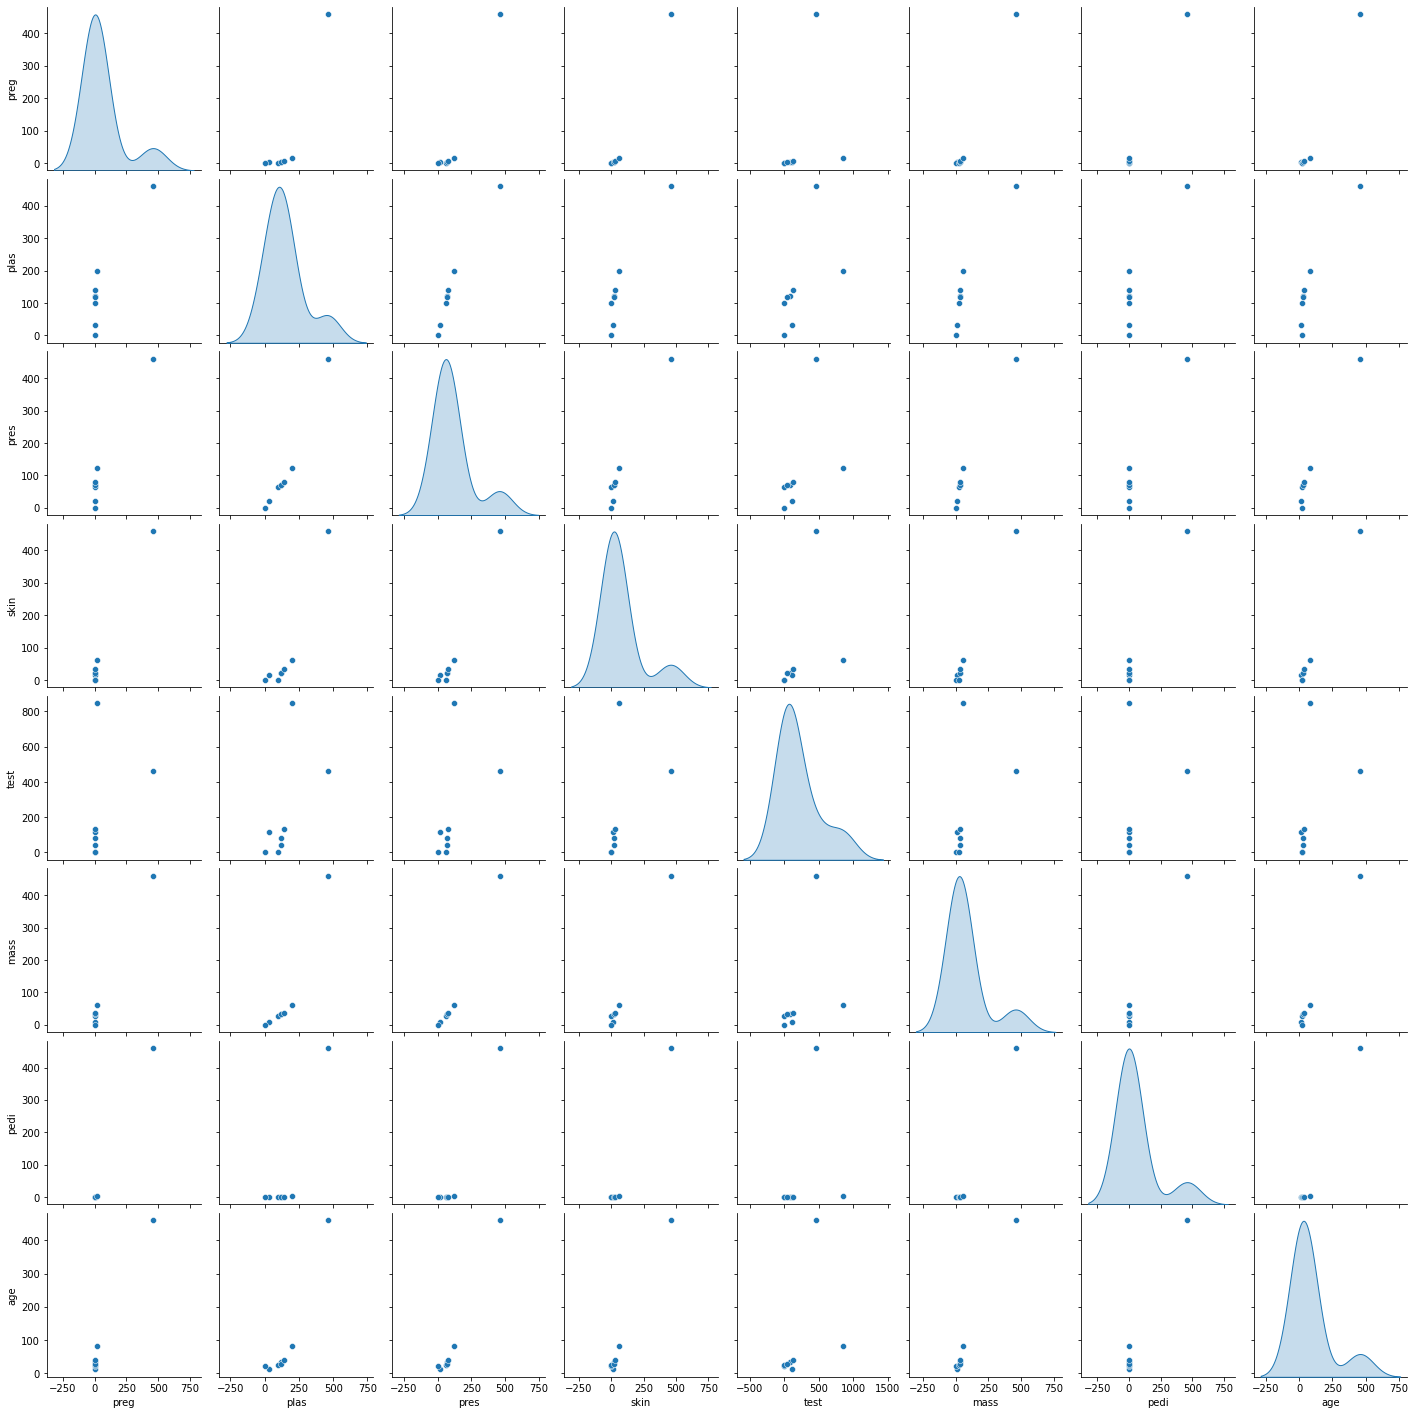

In [19]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("class")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'


In [20]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("class")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
preg,460.0,3.815217,3.270417,0.000,1.00000,3.0000,6.0000,15.00
plas,460.0,120.730435,31.369003,0.000,99.75000,117.5000,140.0000,198.00
pres,460.0,69.169565,19.195178,0.000,64.00000,71.0000,80.0000,122.00
skin,460.0,20.923913,16.054125,0.000,0.00000,23.0000,33.0000,63.00
test,460.0,83.039130,115.530200,0.000,0.00000,40.5000,130.0000,846.00
mass,460.0,32.215000,7.851712,0.000,27.70000,32.4000,36.6000,59.40
pedi,460.0,0.461257,0.316313,0.078,0.24225,0.3645,0.6125,2.42
age,460.0,33.000000,11.419320,21.000,24.00000,29.0000,40.0000,81.00


# class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)
# We will remove them from each dataset split (train, test, validate) and save them into new variables.
## Note: we maintain the order of the labels and data from now on to make sure each example/row is associated with the right label.

In [21]:

train_labels = train_dataset.pop('class')
test_labels = test_dataset.pop('class')
valid_labels = valid_dataset.pop('class')

# Data Normalization/Scaling
## Subtract the mean of the training data and divide by the standard deviation of the training data.

In [28]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)
train_dataset.shape

(460, 8)

In [23]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')


Train/Test/Validate splits: 
Train    : (460, 8) 
Test     : (154, 8) 
Validate : (154, 8) 
Train/Test/Validate labels: 
Train Labels : (460,) 
Test Labels  : (154,) 
Test Labels  : (154,) 


In [27]:
# show a sample of the data after normalized
normed_train_data.head(10)
normed_train_data.shape

(460, 8)

# Build a Neural Network Model 

In [25]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


2022-03-06 11:52:55.738945: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Training the model we built above.

In [26]:
%%time

# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
#     model.add(Dense(128,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model


EPOCHS = 100
batch_size = 16 # 6 iteration

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )



Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28/28 [==============================] - 2s 19ms/step - loss: 0.8195 - accuracy: 0.5179 - val_loss: 0.7573 - val_accuracy: 0.5974
Epoch 2/100
28/28 [==============================] - 0s 9ms/step - loss: 0.8289 - accuracy: 0.5090 - val_loss: 0.7551 - val_accuracy: 0.5974
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 0.7978 - accuracy: 0.5428 - val_loss: 0.7529 - val_accuracy: 0

Epoch 54/100
28/28 [==============================] - 0s 5ms/step - loss: 0.7171 - accuracy: 0.6171 - val_loss: 0.6638 - val_accuracy: 0.6883
Epoch 55/100
28/28 [==============================] - 0s 7ms/step - loss: 0.7201 - accuracy: 0.6171 - val_loss: 0.6625 - val_accuracy: 0.6883
Epoch 56/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7173 - accuracy: 0.6194 - val_loss: 0.6611 - val_accuracy: 0.6883
Epoch 57/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7138 - accuracy: 0.6216 - val_loss: 0.6598 - val_accuracy: 0.6883
Epoch 58/100
28/28 [==============================] - 0s 5ms/step - loss: 0.7113 - accuracy: 0.6171 - val_loss: 0.6584 - val_accuracy: 0.6883
Epoch 59/100
28/28 [==============================] - 0s 5ms/step - loss: 0.7105 - accuracy: 0.6228 - val_loss: 0.6571 - val_accuracy: 0.6883
Epoch 60/100
28/28 [==============================] - 0s 6ms/step - loss: 0.7165 - accuracy: 0.6194 - val_loss: 0.6558 - val_accuracy: 0.6948
Epoch 

In [27]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.637952,0.668919,0.686974,0.61039,95
96,0.642874,0.693694,0.685902,0.61039,96
97,0.631949,0.677928,0.684770,0.61039,97
98,0.641172,0.695946,0.683752,0.61039,98
99,0.637509,0.691441,0.682689,0.61039,99


# See how the training went by plotting the loss/Accuracy across epochs


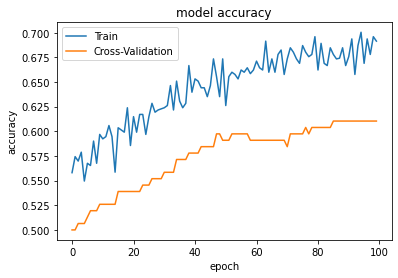

In [30]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

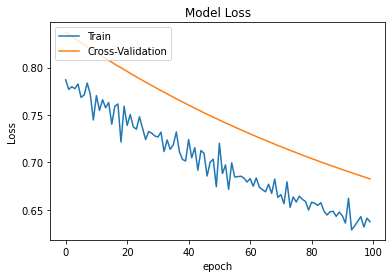

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [32]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))


Train Split: 
15/15 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6870
Accuracy   :  0.69 


In [33]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
5/5 - 0s - loss: 0.6827 - accuracy: 0.6104
Accuracy   :  0.61 


In [34]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))


Test Split: 
5/5 - 0s - loss: 0.6733 - accuracy: 0.6883
Accuracy   :  0.69 


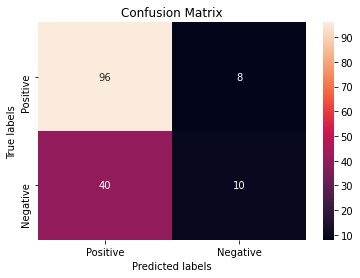

In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);
